Connecting to Google Drive 

In [1]:
def connect_to_drive():
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)

!pip install import_ipynb 
import import_ipynb 
connect_to_drive()
%cd '/content/gdrive/My Drive/Bioinformatics2' 

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=9d1788defefd6b4362c84296dadcfc0b65551caada1e69933a4a83cdfa1af933
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb
Mounted at /content/gdrive
/content/gdrive/My Drive/Bioinformatics2


In [ ]:
!pip install albumentations

     |████████████████████████████████| 631 kB 5.2 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654020 sha256=0278104e0a0763614a44646bcc1bcc655a8ca0a00cad08a269f8e7a374b7aa68
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


Importing modules

In [3]:
import torch
from utils import *
install_requirements()
from VascularDataset import *
import albumentations as A
from torchvision.transforms import *
from torch.utils.data import DataLoader
import segmentation_models_pytorch as smp
import albumentations
from albumentations.augmentations.functional import elastic_transform_approx
import segmentation_models_pytorch as smp
import wandb

     |████████████████████████████████| 88 kB 4.9 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 376 kB 84.2 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=ee72023262f470752dbba9fa3847a7ec5fa24ada6199c2153a54964044c21c5c
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=b15b8def91e24b978d4deee01f9bf12770e801029b7766c36156ef60b6ce787d
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels
     |████████████████████████████████| 1.7 MB 11.5 MB/s 
     |████████████████████████████████| 97 kB 6.9 MB/s 
     |████████████████████████████████| 140 kB 69.7 MB/s 
     |████████████████████████████████|


Defining dataset and dataloaders

In [4]:
input_path_training='/content/gdrive/.shortcut-targets-by-id/1mtNVywqwmtCBefeGQrY2c6F6xBQQWq30/vascular_segmentation/Train'
input_path_test='/content/gdrive/.shortcut-targets-by-id/1mtNVywqwmtCBefeGQrY2c6F6xBQQWq30/vascular_segmentation/Test'

txt_with_training_paths_inputs='/content/gdrive/MyDrive/Bioinformatics2/dataset_paths/training_paths_inputs.txt'
txt_with_training_paths_targets='/content/gdrive/MyDrive/Bioinformatics2/dataset_paths/training_paths_targets.txt'
txt_with_validation_paths_inputs='/content/gdrive/MyDrive/Bioinformatics2/dataset_paths/validation_paths_inputs.txt'
txt_with_validation_paths_targets='/content/gdrive/MyDrive/Bioinformatics2/dataset_paths/validation_paths_targets.txt'
txt_with_test_paths_inputs='/content/gdrive/MyDrive/Bioinformatics2/dataset_paths/test_paths_inputs.txt'
txt_with_test_paths_targets='/content/gdrive/MyDrive/Bioinformatics2/dataset_paths/test_paths_targets.txt'

imgs_training_input_split=read_list_images_path_from_txt(txt_with_training_paths_inputs)
imgs_training_target_split=read_list_images_path_from_txt(txt_with_training_paths_targets)
imgs_validation_input_split=read_list_images_path_from_txt(txt_with_validation_paths_inputs)
imgs_validation_target_split=read_list_images_path_from_txt(txt_with_validation_paths_targets)
imgs_test_input=read_list_images_path_from_txt(txt_with_test_paths_inputs)
imgs_test_target=read_list_images_path_from_txt(txt_with_test_paths_targets)


Selecting transforms

In [5]:
#from torchvision.transforms import *
import albumentations as A
from albumentations.augmentations.transforms import *

#validation_dataset_plain=VascularDatasetNames(imgs_validation_input_split, imgs_validation_target_split)
test_dataset_plain_normalized=VascularDataset(imgs_test_input, imgs_test_target, mean_normalization=(0.7160, 0.4878, 0.6433), std_normalization=(0.1680, 0.2098, 0.1685))
test_dataset_plain=VascularDataset(imgs_test_input, imgs_test_target)

In [ ]:
!pip install torchmetrics

     |████████████████████████████████| 329 kB 5.2 MB/s 


In [6]:
model_path='/content/gdrive/MyDrive/Bioinformatics2/saved_models/1o9z0tra.pth'
model=torch.load(model_path, map_location=torch.device('cpu'))
model.eval()

save_image_paths='/content/gdrive/MyDrive/Bioinformatics2/saved_images_test/'

Visualizing predictions on training



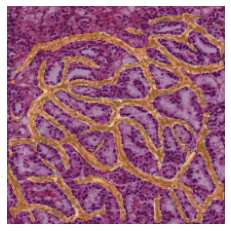

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import imshow
import cv2

colour_dictionary={
    'white':torch.Tensor([255,255,255]),
    'green':torch.Tensor([50,205,50]),
    'red': torch.Tensor([255,99,71]),
    'blue': torch.Tensor([65,105,225]),
    'black': torch.Tensor([0,0,0])
}

colour_dictionary_bgr={
    'white':torch.Tensor([255,255,255]),
    'green':torch.Tensor([50,205,50]),
    'red': torch.Tensor([71,99,255]),
    'blue': torch.Tensor([225,105,65]),
    'black': torch.Tensor([0,0,0])
}

def visualize_prediction(prediction, label, colour_dictionary, image_name):
  '''
  prediction and label are two numpy arrays in two dimensions WxH
  White=TN, Green=TP, RED=FP, BLUE=FN
  '''
  visualization=np.empty(shape=(prediction.shape[0],prediction.shape[1],3))
  for i in range(prediction.shape[0]):
    for j in range(prediction.shape[1]):
      if prediction[i][j]==1 and label[i][j]==1: #TP
        visualization[i,j,:]=colour_dictionary['green']
      elif prediction[i][j]==0 and label[i][j]==0: #TN
        visualization[i,j,:]=colour_dictionary['white']
      elif prediction[i][j]==0 and label[i][j]==1: #FN
        visualization[i,j,:]=colour_dictionary['blue']
      elif prediction[i][j]==1 and label[i][j]==0: #FP
        visualization[i,j,:]=colour_dictionary['red']
  #cv2.resize(visualization, (500,500))
  cv2.imwrite(image_name,visualization.astype(np.uint8))

colour_dictionary={
    'white':torch.Tensor([255,255,255]),
    'green':torch.Tensor([118,246,165]),
    'red': torch.Tensor([245,119,65]),
    'blue': torch.Tensor([107,136,250])
}

def visualize_prediction_on_image(image, prediction, image_name):
  image=image.permute(1,2,0)
  plt.imshow(image)
  plt.imshow(prediction, alpha=0.3)
  plt.axis("off")
  plt.savefig(image_name, bbox_inches='tight', pad_inches=0)


def visualize_label(label):
  visualization=np.empty(shape=(label.shape[0],label.shape[1],3))
  for i in range(label.shape[0]):
    for j in range(label.shape[1]):
      if label[i][j]==1:
        visualization[i,j,:]=colour_dictionary['white']
      elif label[i][j]==0:
        visualization[i,j,:]=colour_dictionary['black']
  cv2_imshow(visualization.astype(np.uint8))


for i in range(len(test_dataset_plain)):
  
  image_normalized=test_dataset_plain_normalized[i][0]
  image=test_dataset_plain[i][0]
  label_normalized=test_dataset_plain_normalized[i][1].squeeze()
  prediction=model(image_normalized.unsqueeze(dim=0)).squeeze()
  plt.imshow(image.permute(1,2,0))
  plt.axis("off")
  image_name=save_image_paths+str(i)+'_rawimage.jpg'
  plt.savefig(image_name, bbox_inches='tight', pad_inches=0)
  image_name=save_image_paths+str(i)+'_rawimage_with_prediction.jpg'
  visualize_prediction_on_image(image, (prediction>0).detach(), image_name)
  image_name=save_image_paths+str(i)+'_contingency.jpg'
  visualize_prediction(prediction>0, label_normalized.squeeze(), colour_dictionary_bgr, image_name)
